<a href="https://colab.research.google.com/github/coryroyce/code_assignments/blob/main/211127_Clustering_Techniques/Gaussian_Mixture_Clustering_Cory_Randolph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gaussian Mixture Clustering
Cory Randolph

11/27/2021

Goal: Demonstrate Gaussian Mixture Clustering



# Load Packages

Import basic packages for visualization

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import sklearn

# Gaussian Mixture Clustering Overview

Gaussian mixture models (GMM) is similar to K-means in the execution except that it finds additional probability distribution is multiple dimensions so that it can better match the input where as K-means naturally clusters in circular patterns around the cluster centers.

# Create Data

Use a sklearn package to create clusters of data. Let's choose 5 clusters for our example.

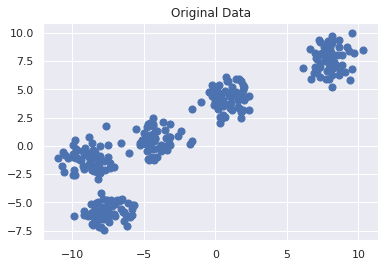

In [13]:
from sklearn.datasets import make_blobs

# Create cluster values in 2 dimensions
X, y_true = make_blobs(n_samples=300, centers=5,
                       cluster_std=0.9, random_state=3)

# Plot the clusters
plt.title('Original Data')
plt.scatter(X[:, 0], X[:, 1], s=50);

# Gaussian Mixture Clustering

Import the Sklearn Gaussian Mixture model and train it on the dataset

In [14]:
from sklearn.mixture import GaussianMixture

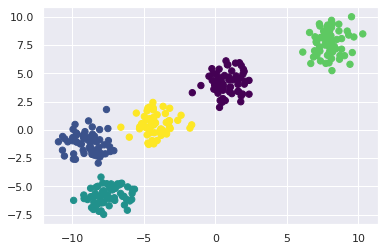

In [15]:
# Instantiate Model
gmm = GaussianMixture(n_components=5).fit(X)
y_gmm = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_gmm, s=40, cmap='viridis');

## GMM vs K-Means

Example of where K-means would not work well

In [16]:
# Set the run state 
rand_state = np.random.RandomState(3)

# Convert the original data to ellipse shapes
X_ellipse = np.dot(X, rand_state.randn(2, 3))

In [17]:
rand_state.randn(2, 3)

array([[-0.08274148, -0.62700068, -0.04381817],
       [-0.47721803, -1.31386475,  0.88462238]])

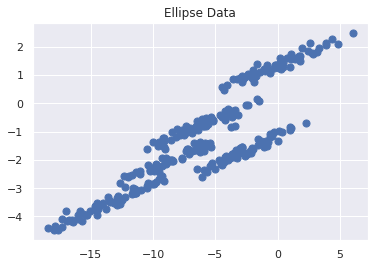

In [18]:
# Plot the clusters
plt.title('Ellipse Data')
plt.scatter(X_ellipse[:, 0], X_ellipse[:, 1], s=50);

Fit with Kmeans from my other kmeans notebook

In [19]:
from sklearn.cluster import KMeans

# Use the KMeans model
kmeans = KMeans(n_clusters=5)

# Fit our data to the model
kmeans.fit(X_ellipse)

# Store the results
y_kmeans = kmeans.predict(X_ellipse)

Plot the data with clusters colored for reference.

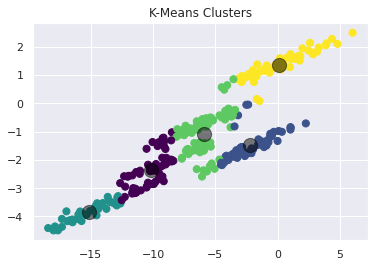

In [20]:
# Define the scatter plot and format
plt.scatter(X_ellipse[:, 0], X_ellipse[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Add Title
plt.title('K-Means Clusters')

# Define the cluster centers and plot
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Here K-Means is not fitting what our intuitive sense of the clusters should be since they are formed in circles around the cluster centers.

Now fit the data with GMM to see clusters

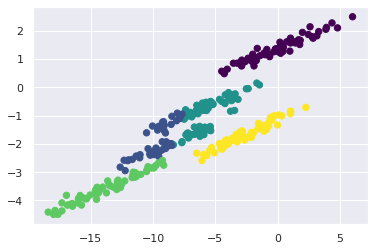

In [21]:
# Instantiate Model
gmm = GaussianMixture(n_components=5, covariance_type='full', random_state=4).fit(X_ellipse)
y_gmm = gmm.predict(X_ellipse)
plt.scatter(X_ellipse[:, 0], X_ellipse[:, 1], c=y_gmm, s=40, cmap='viridis');

While these results are still not perfect, we can see that it is only the two clusters in the middle that are being mixed up. With a little bit of tuning and over training then pruning back these issues can be corrected.

# Reference

Reference notebook provide template for how to calculate the GMM Clusters [Notebook](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.12-Gaussian-Mixtures.ipynb#scrollTo=IQMtKnVdHyO0)

Performance metrics on clustering [Performance Metrics in Machine Learning ](https://towardsdatascience.com/performance-metrics-in-machine-learning-part-3-clustering-d69550662dc6)